In [15]:
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.plots import Plots
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.grid_search import GridSearch
from rewards_rapper import RewardsShapingWrapper

In [16]:
def checkGoalReached(environment, policy):
    goal_state = environment.observation_space.n - 1  # Goal state index
    current_state, info = environment.reset()  # Start from the initial state
    steps = 0
    while current_state != goal_state:
        action = policy[current_state]
        next_state, reward, terminated, truncated, _ = environment.step(action)
        current_state = next_state
        steps += 1
        if truncated:  # Agent fell into a hole
            print("Agent fell into a hole. Goal not reached.")
            break

    if current_state == goal_state:
        print("Agent reached the goal in", steps, "steps.")

In [17]:
VI_8 = []
VI_16 = []
VI_20 = []



Rewards_8 = []
Rewards_16 = []
Rewards_20 = []

In [18]:
def visualizeEnv(frozenLake,size=(8, 8)):

    # Map state to cell type
    state_to_cell = {
        b'S': 'S',  # Start
        b'F': 'F',  # Frozen
        b'H': 'H',  # Hole
        b'G': 'G'   # Goal
    }

    # Map cell type to color
    cell_colors = {
        'S': 'blue',
        'F': 'lightblue',
        'H': 'black',
        'G': 'green'
    }

    # Get the state grid
    state_grid = np.array(env.desc, dtype='str')

    # Create a plot of the grid
    plt.figure(figsize=(4, 4))
    for i in range(state_grid.shape[0]):
        for j in range(state_grid.shape[1]):
            cell_type = state_to_cell[frozenLake.desc[i, j].item()]
            plt.scatter(j, i, color=cell_colors[cell_type], s=100, marker='s')
            plt.text(j, i, cell_type, ha='center', va='center', color='white' if cell_type == 'H' else 'black')

    # Add gridlines to show the boundaries between squares
    plt.grid(True, which='both', color='gray', linewidth=1.5)

    plt.title('FrozenLake Environment')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.gca().invert_yaxis()  # Invert y-axis to match grid indexing
    plt.show()

In [19]:
#env = gym.make('FrozenLake-v1',is_slippery=False)
map_size = 16
env = gym.make('FrozenLake-v1',desc=generate_random_map(size=map_size), is_slippery=False)
shaped_env = RewardsShapingWrapper(env)

In [20]:
env.spec.kwargs['desc']

['SFHFFFFFHFFFFFFF',
 'FHFFHFFFHFFFHHFF',
 'FFFHFFFFFFFFFFFF',
 'FFFFFFHFFFFFFFFF',
 'HHHFFFFFFHFFFFFF',
 'HFFFFFFFFFFFHFFF',
 'FFHFFFFHHFHFFFFH',
 'HHHHFFHFFFHFFFFF',
 'FFFFFFFFFFFFFFHH',
 'FFFHFFFHFFHFFFFF',
 'FHHFFFFFFFFFFFFF',
 'FHHFFFHFHHFFFFFF',
 'FHFHFHFFFFFFFFHF',
 'HFFFFFFFHHFFFFFF',
 'HFFFHFHFFFFFFFFF',
 'FHFHFFFFFHFHFHHG']

In [18]:
shaped_env.observation_space

Discrete(256)

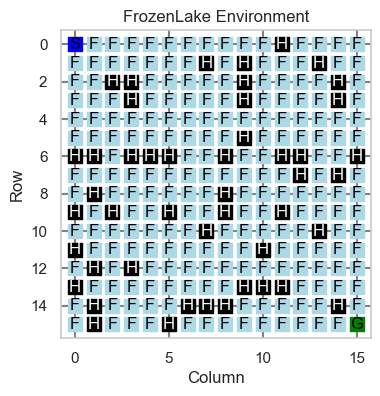

In [144]:
visualizeEnv(env)

In [32]:
len(env.P)

64

In [45]:
env.P[11]

{0: [(0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 19, 0.0, False)],
 1: [(0.3333333333333333, 10, 0.0, False),
  (0.3333333333333333, 19, 0.0, False),
  (0.3333333333333333, 12, 0.0, False)],
 2: [(0.3333333333333333, 19, 0.0, False),
  (0.3333333333333333, 12, 0.0, False),
  (0.3333333333333333, 3, 0.0, False)],
 3: [(0.3333333333333333, 12, 0.0, False),
  (0.3333333333333333, 3, 0.0, False),
  (0.3333333333333333, 10, 0.0, False)]}

In [100]:
gammas=[.99]
n_iters=[10000,50000, 100000]
thetas=[.00001]

In [101]:
GridSearch.vi_grid_search(env, gammas, n_iters, thetas)

running VI with gamma: 0.99  n_iters: 10000  theta: 1e-05
runtime = 0.13 seconds
Avg. episode reward:  0.47
###################
running VI with gamma: 0.99  n_iters: 50000  theta: 1e-05
runtime = 0.13 seconds
Avg. episode reward:  0.44
###################
running VI with gamma: 0.99  n_iters: 100000  theta: 1e-05
runtime = 0.13 seconds
Avg. episode reward:  0.45
###################


In [21]:
gamma_value = 0.99
n_iters_value=1000
theta_value=1e-05

In [19]:
planner = Planner(shaped_env.P)

In [22]:
# run VI
V, V_track, policy = planner.value_iteration(gamma=gamma_value, n_iters=n_iters_value, theta=theta_value)

runtime = 0.53 seconds


In [147]:
print(policy)

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 0, 11: 0, 12: 2, 13: 3, 14: 3, 15: 2, 16: 3, 17: 3, 18: 3, 19: 3, 20: 2, 21: 2, 22: 0, 23: 0, 24: 0, 25: 0, 26: 2, 27: 1, 28: 0, 29: 0, 30: 2, 31: 2, 32: 3, 33: 0, 34: 0, 35: 0, 36: 2, 37: 2, 38: 0, 39: 1, 40: 0, 41: 0, 42: 2, 43: 1, 44: 0, 45: 0, 46: 0, 47: 2, 48: 3, 49: 0, 50: 0, 51: 0, 52: 2, 53: 2, 54: 1, 55: 1, 56: 0, 57: 0, 58: 2, 59: 1, 60: 0, 61: 0, 62: 0, 63: 2, 64: 3, 65: 2, 66: 1, 67: 1, 68: 2, 69: 2, 70: 1, 71: 1, 72: 3, 73: 1, 74: 2, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 3, 81: 3, 82: 3, 83: 3, 84: 3, 85: 3, 86: 2, 87: 0, 88: 0, 89: 0, 90: 2, 91: 3, 92: 3, 93: 0, 94: 3, 95: 3, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 2, 103: 0, 104: 0, 105: 1, 106: 0, 107: 0, 108: 0, 109: 2, 110: 0, 111: 0, 112: 1, 113: 1, 114: 2, 115: 1, 116: 1, 117: 1, 118: 1, 119: 3, 120: 1, 121: 2, 122: 1, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128: 0, 129: 0, 130: 2, 131: 2, 132: 1, 133: 3, 134: 0, 135: 0, 136: 0, 137: 2, 138: 

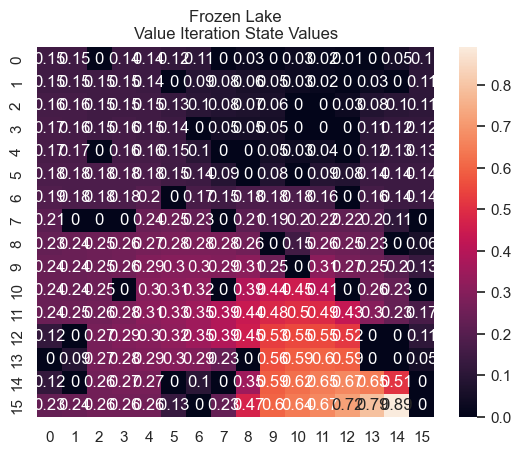

In [24]:
size=(map_size,map_size)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

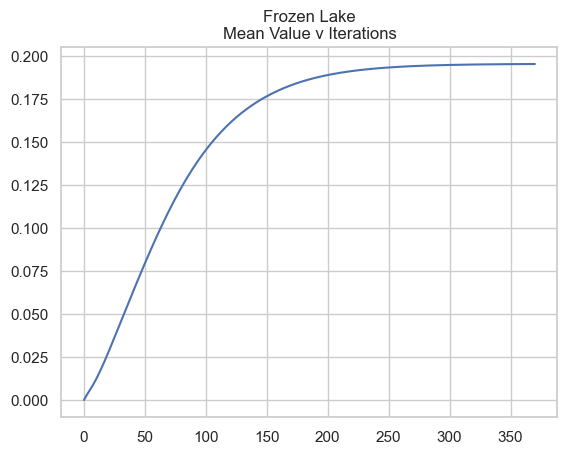

In [25]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\nMean Value v Iterations")

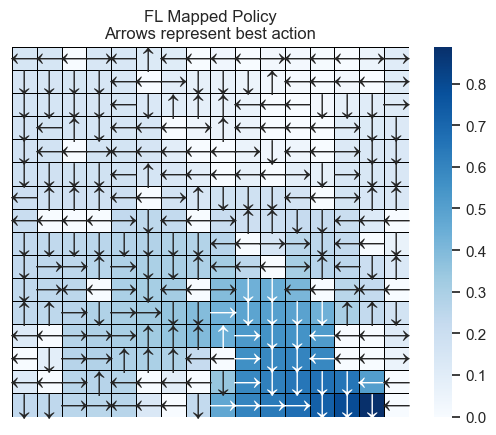

In [26]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(map_size,map_size)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [27]:
#test policy
test_scores = TestEnv.test_env(env=env, n_iters=100, render=False, pi=policy, user_input=False)
print(np.mean(test_scores))
percent_test_score = sum(test_scores)/len(test_scores) * 100
print(f"Percent Rewards Score = {percent_test_score}" )

0.05
Percent Rewards Score = 5.0


In [152]:
V_8.append(V)
Rewards_8.append(percent_test_score)

In [172]:
# Check if goal was reached
checkGoalReached(env,policy)

Agent fell into a hole. Goal not reached.


## Policy Iteration

In [28]:
gammas=[.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]
n_iters=[500]
thetas=[ .00001]

In [29]:
GridSearch.pi_grid_search(env, gammas, n_iters, thetas)

running PI with gamma: 0.2  n_iters: 500  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.08
###################
running PI with gamma: 0.3  n_iters: 500  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.06
###################
running PI with gamma: 0.4  n_iters: 500  theta: 1e-05
runtime = 0.03 seconds
Avg. episode reward:  0.07
###################
running PI with gamma: 0.5  n_iters: 500  theta: 1e-05
runtime = 0.04 seconds
Avg. episode reward:  0.07
###################
running PI with gamma: 0.6  n_iters: 500  theta: 1e-05
runtime = 0.05 seconds
Avg. episode reward:  0.06
###################
running PI with gamma: 0.7  n_iters: 500  theta: 1e-05
runtime = 0.05 seconds
Avg. episode reward:  0.1
###################
running PI with gamma: 0.8  n_iters: 500  theta: 1e-05
runtime = 0.03 seconds
Avg. episode reward:  0.11
###################
running PI with gamma: 0.9  n_iters: 500  theta: 1e-05
runtime = 0.05 seconds
Avg. episode reward:  0.08
###################
r

In [30]:
gamma_pi_value = 0.99
n_iters_pi_value=500
theta_pi_value=.00001

In [31]:
# run PI
V_pi, V_track_pi, policy_Pi = planner.policy_iteration(gamma=gamma_pi_value, n_iters=n_iters_pi_value, theta=theta_pi_value)

runtime = 0.70 seconds


In [32]:
test_scores_pi = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=policy_Pi, user_input=False)
print(np.mean(test_scores_pi))

0.055


In [33]:
percent_test_score = sum(test_scores_pi)/len(test_scores_pi) * 100
print(f"Percent Rewards Score = {percent_test_score}" )

Percent Rewards Score = 5.5


In [34]:
env.spec

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'map_name': '4x4', 'desc': ['SFHFFFFHFHFFFHFF', 'FFFFFHFFFFFFHFHF', 'FFFFFFFFFFHHFFFF', 'FFFFFFHFFFHHHFFF', 'FFHFFFFHHFFFHFFF', 'FFFFFFFFHFHFFFFF', 'FFFFFHFFFFFFHFFF', 'FHHHFFFHFFFFFFFH', 'FFFFFFFFFHFFFFHF', 'FFFFFFFFFFHFFFFF', 'FFFHFFFHFFFFHFFH', 'FFFFFFFFFFFFFFFF', 'FHFFFFFFFFFFFHHF', 'HFFFFFFFHFFFFHHF', 'FHFFFHFHFFFFFFFH', 'FFFFFFHFFFFFFFFG'], 'is_slippery': True}, namespace=None, name='FrozenLake', version=1)

In [35]:
env.observation_space

Discrete(256)

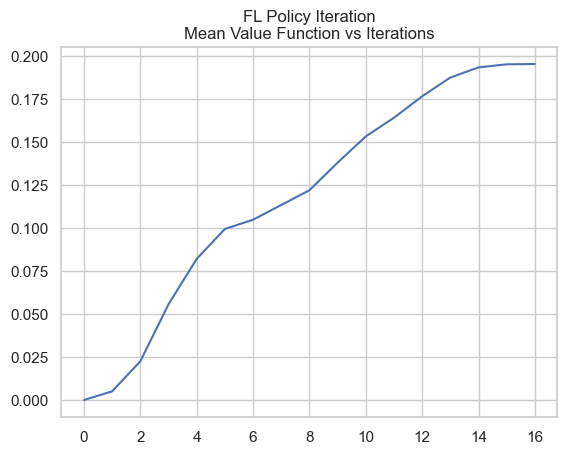

In [36]:
max_value_pi_per_iter = np.trim_zeros(np.mean(V_track_pi, axis=1), 'b')
Plots.v_iters_plot(max_value_pi_per_iter, "FL Policy Iteration\nMean Value Function vs Iterations")

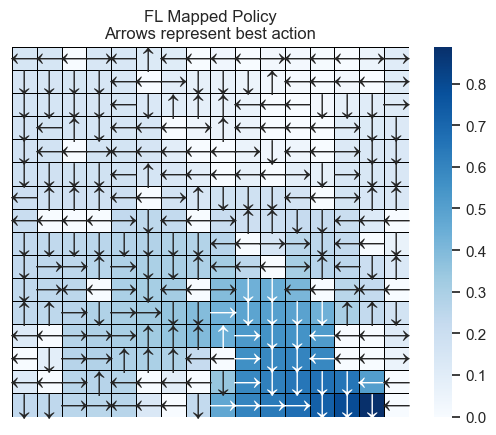

In [37]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(map_size,map_size)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [173]:
checkGoalReached(env,policy_Pi)

Agent fell into a hole. Goal not reached.


## Q Learning 

In [125]:
gamma=[.99]
epsilon_decay = [0.001, 0.009,0.01, 0.09, 0.1, 0.9, 0.99 ]
iters = [100000]
GridSearch.q_learning_grid_search(env, gamma, epsilon_decay, iters)

running q_learning with gamma: 0.99 epsilon decay: 0.001  iterations: 100000


runtime = 152.62 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.009  iterations: 100000


runtime = 152.45 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.01  iterations: 100000


runtime = 152.97 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.09  iterations: 100000


runtime = 150.60 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.1  iterations: 100000


runtime = 150.79 seconds
Avg. episode reward:  0.0
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 100000


runtime = 87.09 seconds
Avg. episode reward:  0.41
###################
running q_learning with gamma: 0.99 epsilon decay: 0.99  iterations: 100000


runtime = 84.78 seconds
Avg. episode reward:  0.34
###################


In [38]:
gamma_q_value=.7
epsilon_decay_q_value = 0.9
iters_q_value = 100000

In [21]:
# Q-learning
Q, qlearn_V, qlearn_pi, Q_track, qlearn_pi_track = RL(shaped_env).q_learning(gamma=.99, epsilon_decay_ratio=0.9,
                   n_episodes=100000)

runtime = 6.15 seconds


In [23]:
#test policy
test_scores = TestEnv.test_env(env=shaped_env, n_iters=1000, render=False, pi=qlearn_pi, user_input=False)
print(np.mean(test_scores))

-0.01


In [7]:
Q_track.shape

(100000, 256, 4)

In [9]:
#get formatted state values and policy map
f1_actions = 
val_qlearn_max, policy_qlearn_map = Plots.get_policy_map(qlearn_pi, qlearn_V, fl_actions, fl_map_size)

title_qlearn = "Q Learn \nOptimal FL Policy Map \n H= Hit, S=Stick"
Plots.plot_policy(val_qlearn_max, policy_qlearn_map, fl_map_size, title_qlearn)

NameError: name 'fl_actions' is not defined

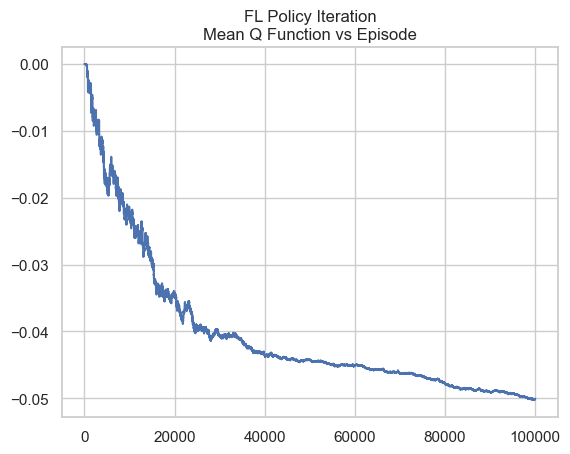

In [10]:
mean_Q_per_episode = np.mean(np.max(Q_track,axis=2), axis =1)

Plots.v_iters_plot(mean_Q_per_episode, "FL Policy Iteration\nMean Q Function vs Episode")
#for a in Q_track:
#    Qv_track.append(np.max(a, axis=1))

In [14]:
checkGoalReached(env,qlearn_pi)

Agent fell into a hole. Goal not reached.
